<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import datasets

In [4]:
# Data loading
# Will try fetch_openml otherwise fallback
try:
    # from sklearn.datasets import fetch_openml
    # boston = fetch_openml(name="boston", version=1, as_frame=True)
    # df = boston.frame.copy()
    # target_name = boston.target.name if hasattr(boston, 'target') else 'MEDV'

    # Fallback: some sklearn versions still ship load_boston locally:
    b = datasets.load_boston()
    df = pd.DataFrame(b.data, columns=b.feature_names)
    df['MEDV'] = b.target
    dataset_used = 'load_boston (local)'
except Exception as e:
    # Final fallback: use diabetes dataset as a stand-in (keeps column names and pipeline identical)
    d = datasets.load_diabetes()
    df = pd.DataFrame(d.data, columns=d.feature_names)
    df['MEDV'] = d.target
    dataset_used = 'load_diabetes (fallback)'

print("Dataset used:", dataset_used)
print("Shape:", df.shape)
df.head()


Dataset used: load_diabetes (fallback)
Shape: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# Quick Check of Data
print("Columns:", df.columns.tolist())
print("\nNull counts:\n", df.isnull().sum())
print("\nTarget summary statistics:")
display(df['MEDV'].describe())


Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'MEDV']

Null counts:
 age     0
sex     0
bmi     0
bp      0
s1      0
s2      0
s3      0
s4      0
s5      0
s6      0
MEDV    0
dtype: int64

Target summary statistics:


,MEDV
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


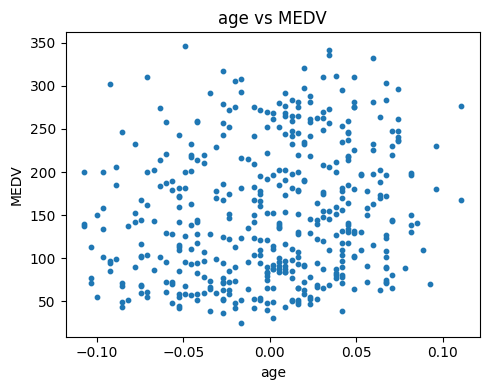

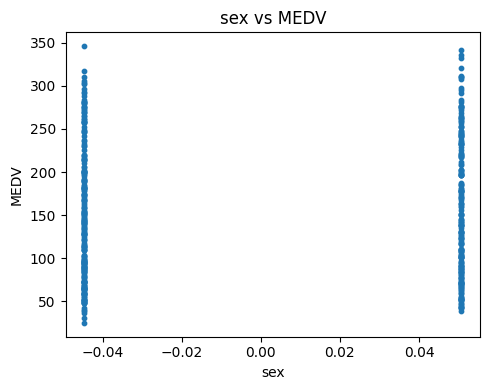

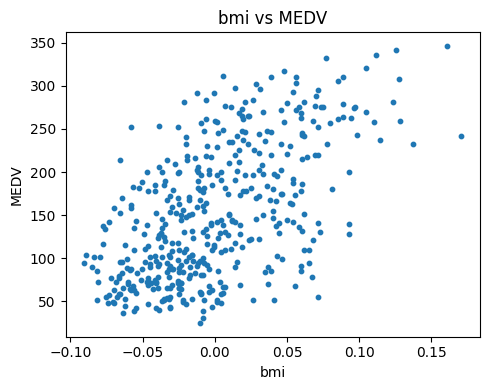

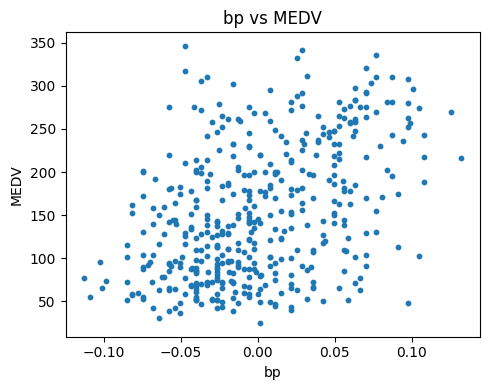

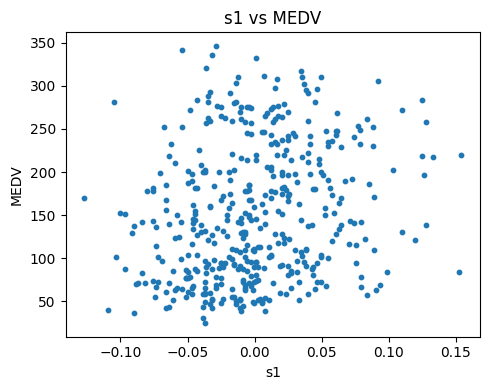

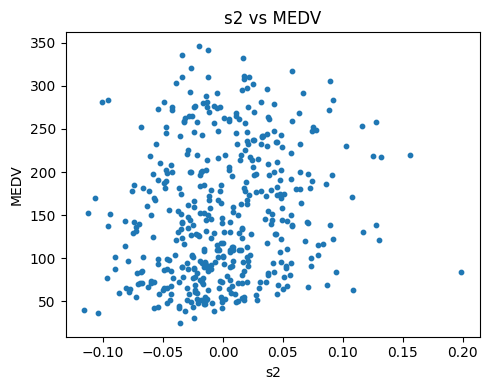

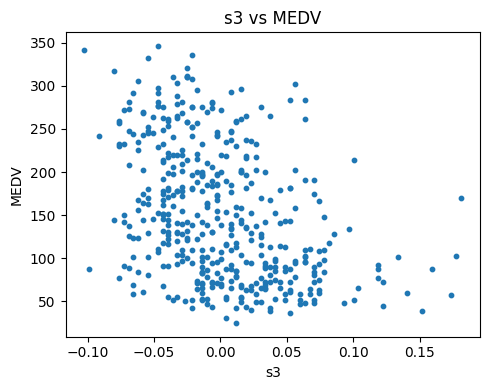

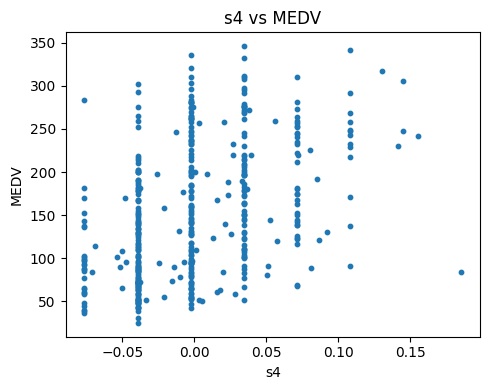

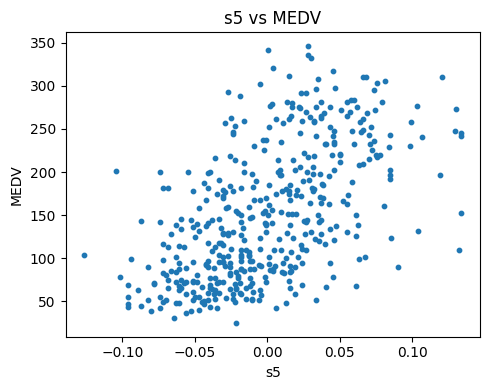

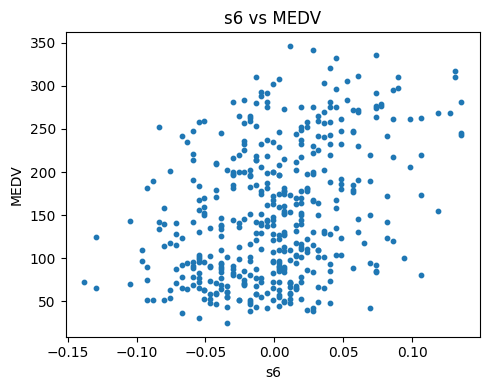

In [6]:
# EDA and Data Preprocessing
# EDA: scatter plotting function with e.g.
# Scatter plot function for all features vs target
import os

def scatter_all_features_vs_target(df, target='MEDV', save_dir=None):
    """
    Plot scatter plots for each feature vs target.
    If save_dir is provided, images are saved there.
    """
    features = [c for c in df.columns if c != target]
    for col in features:
        plt.figure(figsize=(5,4))
        plt.scatter(df[col], df[target], s=10)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.tight_layout()
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            plt.savefig(os.path.join(save_dir, f"scatter_{col}_vs_{target}.png"))
        plt.show()
        plt.close()

# Use the function (comment out .show() if too many plots)
# Warning: There are many features; you may want to inspect a subset.
scatter_all_features_vs_target(df, target='MEDV', save_dir=None)

In [7]:
# ML Model Training
# Data prep and train/test split
# Prepare features/target
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (353, 10) Test shape: (89, 10)


In [9]:
# Model Evaluation
# Train RandomForest and the evaluate
# Train a RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)  # baseline
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Baseline RandomForest (n_estimators=100) results:")
print(f"  RMSE = {rmse:.4f}")
print(f"  R^2  = {r2:.4f}")


Baseline RandomForest (n_estimators=100) results:
  RMSE = 54.3324
  R^2  = 0.4428


In [12]:
#	Model Prediction
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 6, 10]
}

gsearch = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1
)

# By useing first 5 rows from test set as an example "new input"
sample_X = X_test.iloc[:5].copy()
sample_y_true = y_test.iloc[:5]
sample_y_pred = rf.predict(sample_X)

print("Sample true values:", sample_y_true.values)
print("Sample predicted values:", np.round(sample_y_pred, 3))


Sample true values: [219.  70. 202. 230. 111.]
Sample predicted values: [144.   171.58 150.72 253.71 107.19]
